In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 8]

### Loading Data

In [2]:
jobs = pd.read_csv('./data/2019-03-15_jobs.csv', header = 0)

In [4]:
rejects = pd.read_csv('./data/2019-03-15_rejects.csv', header = 0)
reject_details = pd.read_csv('./data/2019-03-15_reject_details.csv', header = 0)
rejects = reject_details.merge(rejects.rename(columns = {'id': 'reject_id'}), on = 'reject_id', how = 'left')

In [21]:
# \s(\r\n|\r|\n)+
# [^,]\"[^,\s]
# \\\"(?<=[^,\s])
# , comma in Quotes "just passing time while I wait on my digivice.lso I'm trash so there's that."Just because you're trash, doesn't mean you can't do great things. It's called a garbage can, not a garbage cannot.\" - Oscar the grouch probably,robably not."

users = pd.read_csv('./data/2019-03-15_users.csv')

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12715 entries, 0 to 12714
Data columns (total 39 columns):
user_id                   12715 non-null int64
birthday                  12590 non-null object
gender                    12715 non-null object
photo_count               12715 non-null int64
profile_score             10288 non-null float64
profile_tier              10288 non-null object
bio                       1823 non-null object
characters                3273 non-null object
height                    12467 non-null float64
body_type                 12456 non-null object
blood_type                2945 non-null object
education                 12280 non-null object
school                    1010 non-null object
job                       12427 non-null object
company                   955 non-null object
religion                  12425 non-null object
smoking                   12421 non-null object
drinking                  12424 non-null object
region                    12478 n

### Feature

In [23]:
users = users.replace('NULL', np.nan)

In [24]:
users['birthday'] = pd.to_datetime(users.birthday, errors = 'coerce')

In [25]:
users['age'] = 2019 - pd.DatetimeIndex(users.birthday).year
users.loc[users.age >= 100, 'age'] = -1
users['age'] = users.age.fillna(-1)

In [26]:
users['account_created_day'] = pd.DatetimeIndex(users.account_created_at).day
users['account_created_weekday'] = pd.DatetimeIndex(users.account_created_at).weekday
users['account_created_hour'] = pd.DatetimeIndex(users.account_created_at).hour

In [27]:
users['created_to_confirm_seconds'] = (pd.DatetimeIndex(users.admin_confirmed_at) - pd.DatetimeIndex(users.account_created_at)).seconds
users['confirm_to_complete_seconds'] = (pd.DatetimeIndex(users.stage_updated_at) - pd.DatetimeIndex(users.admin_confirmed_at)).seconds

In [30]:
users.loc[users.created_to_confirm_seconds > 80000]

,user_id,birthday,gender,photo_count,profile_score,profile_tier,bio,characters,height,body_type,...,sign_up_completed,stage,stage_updated_at,last_activity_at,age,account_created_day,account_created_weekday,account_created_hour,created_to_confirm_seconds,confirm_to_complete_seconds
625,1869855,1995-11-04,F,2,55.46,Gold,NaN,NaN,153.0,BF02,...,Y,NaN,2019-03-04 13:36:25,2019-03-15 09:28:10,24.0,22,4,15,80323.0,194.0
1084,1871716,1983-04-19,F,3,73.66,Diamond,NaN,NaN,160.0,BF05,...,Y,NaN,2019-02-24 11:07:51,2019-03-15 10:38:56,36.0,23,5,12,82034.0,331.0
1961,1874983,1988-01-01,F,2,56.05,Gold,NaN,UC20|UC08,167.0,BF05,...,Y,NaN,2019-02-25 15:15:40,2019-02-26 22:44:33,31.0,24,6,16,82195.0,271.0
2278,1876291,1994-12-18,F,3,NaN,NaN,NaN,NaN,160.0,BF01,...,N,Review,2019-03-01 08:04:49,2019-03-01 08:37:49,25.0,25,0,8,85891.0,86232.0
2483,1877109,1990-08-29,F,2,64.98,Gold,NaN,NaN,155.0,BF02,...,Y,NaN,2019-02-26 14:06:07,2019-03-15 10:47:38,29.0,25,0,14,83238.0,158.0
2514,1877248,1994-11-04,F,2,69.31,Diamond,나,NaN,167.0,BF03,...,Y,NaN,2019-02-27 15:54:32,2019-02-27 16:00:11,25.0,25,0,15,86279.0,127.0
2589,1877526,2000-10-01,F,4,68.88,Diamond,엉뚱하고 잘웃고 소고기에 와인보다 삼겹살에 쏘주 좋아하는 20살입니댱,UC11|UC16|UC09,160.0,BF05,...,Y,NaN,2019-02-26 19:04:28,2019-03-13 15:46:46,19.0,25,0,19,85327.0,1102.0
2947,1878856,1999-05-28,F,5,84.64,Diamond,진지하게 연락해보실 분<~?☺️,NaN,163.0,BF02,...,Y,NaN,2019-02-27 11:00:37,2019-03-15 12:36:20,20.0,26,1,12,80745.0,115.0
3360,1880529,1999-05-01,F,3,48.81,Silver,"im very welcome people\nnot funny , but i can ...",NaN,152.0,BF02,...,Y,NaN,2019-02-28 06:08:33,2019-03-12 15:22:57,20.0,27,2,7,80376.0,173.0
3562,1881320,1994-09-01,F,4,88.13,Diamond,NaN,NaN,159.0,BF01,...,Y,NaN,2019-03-02 13:01:27,2019-03-02 14:18:14,25.0,27,2,14,80114.0,118.0


In [36]:
rejects

,reject_id,context,user_id,admin_id,rejected_at
0,956529358,picture_0,1867729,63,2019-02-21 15:10:14
1,956529358,picture_1,1867729,63,2019-02-21 15:10:14
2,956529364,picture_0,1867747,63,2019-02-21 15:16:29
3,956529364,picture_1,1867747,63,2019-02-21 15:16:29
4,956529449,height,1867983,63,2019-02-21 17:14:05
...,...,...,...,...,...
11005,956576379,picture_0,1920150,63,2019-03-14 14:41:27
11006,956576389,picture_0,1920150,63,2019-03-14 14:51:06
11007,956576389,picture_1,1920150,63,2019-03-14 14:51:06
11008,956576388,picture_1,1920161,63,2019-03-14 14:50:56


In [37]:
reject_counts = pd.DataFrame(rejects.groupby('user_id')['reject_id'].agg(len))
reject_counts = reject_counts.rename(columns = {'reject_id': 'reject_counts'}).reset_index()

In [39]:
users = users.merge(reject_counts, how = 'left', on = 'user_id')

In [40]:
users = users.astype({'age': 'int32', 'account_created_day': 'int32', 
                      'account_created_weekday': 'int32', 'account_created_hour': 'int32'}, errors = 'ignore')

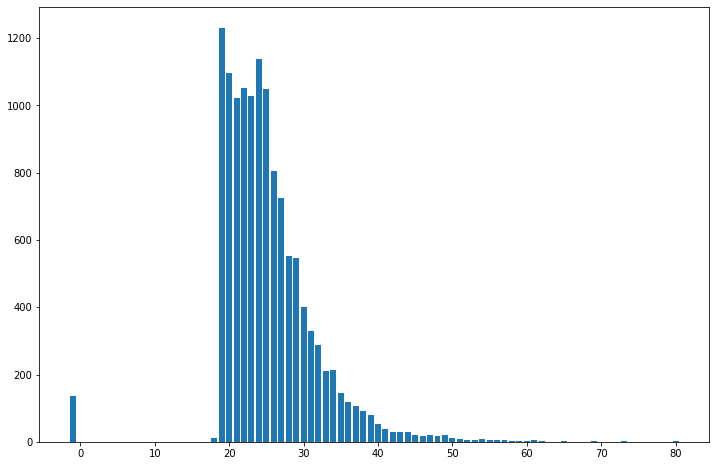

In [43]:
y = users.age.value_counts()
x = y.index

plt.bar(x, y)
plt.show()

In [44]:
users.profile_score.describe()

count    10288.000000
mean        68.274002
std         12.255224
min         31.570000
25%         59.775000
50%         69.310000
75%         77.045000
max        100.000000
Name: profile_score, dtype: float64

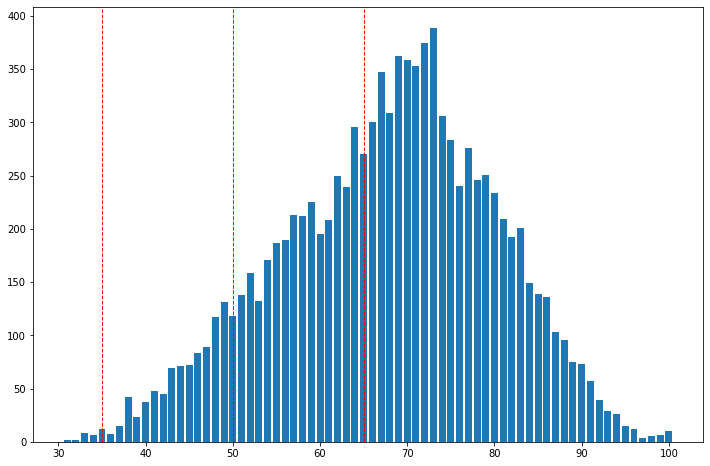

In [45]:
y = np.floor(users.profile_score).value_counts()
x = y.index

plt.bar(x, y)
plt.axvline(65, color='red', linestyle='dashed', linewidth=1)
plt.axvline(50, color='red', linestyle='dashed', linewidth=1)
plt.axvline(35, color='red', linestyle='dashed', linewidth=1)
plt.show()

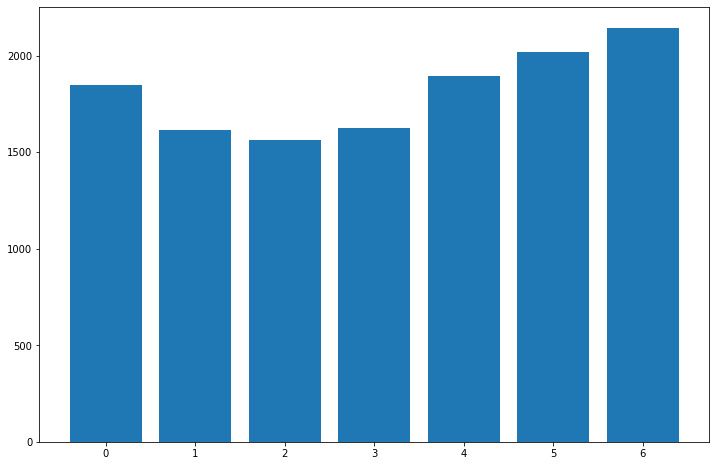

In [46]:
y = users.account_created_weekday.value_counts()
x = y.index

plt.bar(x, y)
plt.show()

In [47]:
account_created_by_time = users.groupby(['account_created_weekday','account_created_hour'])['user_id'].agg(len).unstack().T
account_created_by_time.columns = ['M', 'Tu', 'W', 'Th', 'F', 'S', 'S']

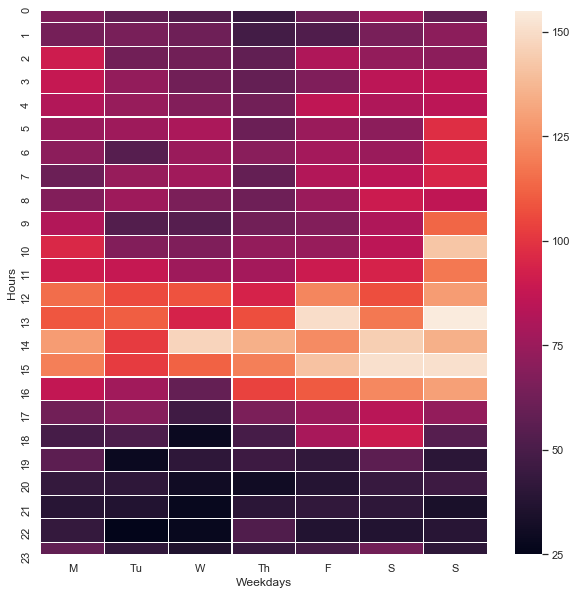

In [48]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(account_created_by_time, linewidth = 0.2)
plt.ylabel('Hours')
plt.xlabel('Weekdays')
plt.show()
plt.rcParams['figure.figsize'] = [16, 10]

In [49]:
out_service_mask = (users.is_out == 'Y') | (users.is_deactivated == 'Y') | (users.is_blocked == 'Y')
users.loc[~out_service_mask]

,user_id,birthday,gender,photo_count,profile_score,profile_tier,bio,characters,height,body_type,...,stage,stage_updated_at,last_activity_at,age,account_created_day,account_created_weekday,account_created_hour,created_to_confirm_seconds,confirm_to_complete_seconds,reject_counts
5,1867735,1991-04-20,F,2,66.50,Diamond,NaN,NaN,160.0,BF04,...,NaN,2019-02-21 15:11:24,2019-03-15 09:04:39,28,21,3,15,400.0,59.0,NaN
16,1867776,1994-01-16,F,3,71.97,Diamond,NaN,NaN,167.0,BF01,...,NaN,2019-02-21 15:31:27,2019-03-15 12:02:20,25,21,3,15,164.0,359.0,NaN
17,1867781,1998-02-13,F,6,89.21,Diamond,NaN,UC08|UC05|UC02,163.0,BF02,...,NaN,2019-02-21 15:30:39,2019-03-14 08:30:55,21,21,3,15,298.0,111.0,NaN
18,1867783,1987-04-20,F,6,67.71,Diamond,NaN,NaN,130.0,BF02,...,NaN,2019-02-21 15:55:19,2019-03-14 23:19:27,32,21,3,15,951.0,906.0,NaN
23,1867807,1989-06-15,F,3,73.99,Diamond,NaN,NaN,159.0,BF02,...,NaN,2019-02-21 15:47:07,2019-03-15 10:40:55,30,21,3,15,515.0,69.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12709,1920188,1997-01-10,F,3,61.00,Gold,NaN,NaN,155.0,BF05,...,NaN,2019-03-14 15:05:03,2019-03-15 12:40:40,22,14,3,14,643.0,87.0,NaN
12710,1920193,1999-08-21,F,5,62.50,Gold,NaN,UC09|UC02|UC16,157.0,BF00,...,NaN,2019-03-14 15:13:18,2019-03-15 02:40:34,20,14,3,14,599.0,576.0,NaN
12711,1920194,1998-12-10,F,2,85.22,Diamond,NaN,UC04|UC08|UC15,160.0,BF02,...,NaN,2019-03-14 15:17:19,2019-03-15 06:52:05,21,14,3,14,601.0,802.0,NaN
12712,1920197,1997-05-10,F,4,65.28,Diamond,NaN,NaN,168.0,BF02,...,NaN,2019-03-14 15:07:34,2019-03-15 12:19:33,22,14,3,14,589.0,197.0,NaN


### Users

#### Churned Profiles

In [55]:
# Churned Profile
churned_mask = (users.is_confirm.isna()) & (users.reject_counts.isna())
users.loc[churned_mask].stage.value_counts()

Picture         479
Birthday        126
Nickname         74
Location         37
MatchSetting     35
Job              26
Height           13
Body             11
Education         4
Religion          4
Drinking          3
Smoking           2
Name: stage, dtype: int64

#### On Boarding Profiles

In [56]:
# On Boarding Profile
on_boarding_mask = (users.is_confirm.isna()) & (users.reject_counts.notnull())
on_boarding_users = users.loc[on_boarding_mask]

In [57]:
rejects.loc[rejects.user_id.isin(on_boarding_users.user_id), ['context', 'reject_id']].groupby('context').agg(len).unstack()

           context         
reject_id  AMP005               273
           AMP017                22
           birthday              38
           gender                20
           height                90
           job                    6
           nickname              14
           picture_0           1189
           picture_1           1268
           picture_2            772
           picture_3            331
           picture_4            240
           picture_5            183
           single                 8
           사진도용은 가입이 불가능합니다       2
dtype: int64

#### Banned Profiles

In [58]:
# Banned Profile
banned_mask = (users.is_confirm == 'N')
banned_profiles = users.loc[banned_mask]

#### Confirmed Profiles

In [59]:
# Confirmed Profile
confirmed_mask = (users.is_confirm == 'Y')
confirmed_profiles = users.loc[confirmed_mask]

In [60]:
confirmed_profiles.confirm_to_complete_seconds.describe()

count    10289.000000
mean      4842.232190
std      16569.482384
min         34.000000
25%        136.000000
50%        311.000000
75%        962.000000
max      86395.000000
Name: confirm_to_complete_seconds, dtype: float64

#### Blocked Profiles

In [61]:
# Blocked Profile
blocked_mask = (users.is_confirm == 'Y') & (users.is_blocked == 'Y') 
blocked_profiles = users.loc[blocked_mask]

In [62]:
blocked_profiles.profile_score.describe()

count    278.000000
mean      83.607878
std        6.731312
min       55.790000
25%       80.322500
50%       84.840000
75%       87.995000
max       96.640000
Name: profile_score, dtype: float64

In [63]:
with open('blocked_bio.txt', 'w') as f:
    for text in blocked_profiles['bio'].iteritems():
        f.write(str(text) + '\n')

In [64]:
blocked_profiles.loc[blocked_profiles.bio.notnull(), 'bio']

4                     혼자사는데   저랑 술친구 밥친구 톡친구 해요  카톡T886
34                    좋은인연되길 바래요^^\n카.톡: ｎｎｙ３３ 연락 주세요~~
37                        앱 자주안해서  카톡로 대화할까요 ? 카톡 :T886
69                       나이 상관없이 저랑 친구 하실분요\nㄲㅑ 똑: ttu8
71             톡 친구 밥친구 술친구 하실분  같이드라이브해도 좋아해요 카톡 :T886
                              ...                      
11645    자주 확인을 못해요  답장 늦거나   연결이 조금 늦어져도  기다려 주시면 감하행요
12405                               안녕하세요  방가워요 캐뚁 1363
12421                                   모야 이거 어떻게 하는거야ㅠ
12513                 어플 탈퇴할걸라 ㅠㅠ 친하게 지낼분은 톡1994669주세요~
12527      답장이  늦더라도    기다려 주세용  답장늦으면 카톡 199266 추가 주세용
Name: bio, Length: 62, dtype: object

#### Pure Profiles

In [65]:
pure_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna())
pure_profiles = users.loc[pure_mask]

In [74]:
pure_profiles.groupby('profile_tier')['confirm_to_complete_seconds'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
profile_tier,,,,,,,,
Diamond,6204.0,3646.472276,14125.522714,34.0,121.00,254.0,841.00,86392.0
Gold,2927.0,5332.333106,17428.730254,38.0,156.00,357.0,1032.00,86395.0
Silver,861.0,11769.378630,25936.640037,51.0,686.00,987.0,2992.00,86385.0
Bronze,18.0,25905.500000,35820.341844,681.0,982.75,2971.5,45642.75,86375.0


#### Deactivated Profiles

In [1178]:
deactivated_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_deactivated == 'Y')
users.loc[deactivated_mask]

,user_id,birthday,gender,photo_count,profile_score,profile_tier,bio,characters,height,body_type,...,stage_updated_at,last_activity_at,age,account_created_day,account_created_weekday,account_created_hour,created_to_complete_seconds,created_to_confirm_seconds,confirm_to_complete_seconds,reject_counts
0,1867728,1997-02-06,F,6,59.98,Gold,NaN,NaN,156.0,BF01,...,2019-02-21 15:26:14,2019-02-21 15:38:31,22,21,3,15,1552,974.0,578.0,NaN
1,1867729,1999-06-14,F,3,49.67,Silver,NaN,NaN,160.0,BF05,...,2019-02-21 15:26:55,2019-02-21 16:08:26,20,21,3,15,1583,1488.0,95.0,1.0
2,1867731,2000-06-16,F,4,66.88,Diamond,NaN,NaN,161.0,BF00,...,2019-02-21 15:12:34,2019-02-21 15:16:44,19,21,3,15,643,492.0,151.0,NaN
3,1867733,1997-10-01,F,6,54.04,Gold,NaN,NaN,161.0,BF05,...,2019-02-21 15:36:38,2019-02-21 15:47:52,22,21,3,15,2025,817.0,1208.0,NaN
7,1867742,1984-01-10,F,6,54.53,Gold,NaN,NaN,170.0,BF02,...,2019-02-21 15:20:27,2019-03-03 17:47:05,35,21,3,15,792,542.0,250.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,1906349,1984-03-22,F,2,57.04,Gold,NaN,NaN,163.0,BF02,...,2019-03-09 14:16:18,2019-03-09 14:34:48,35,9,5,13,1034,937.0,97.0,1.0
9694,1906369,1996-03-14,F,3,66.32,Diamond,NaN,NaN,157.0,BF02,...,2019-03-09 14:28:40,2019-03-09 14:46:54,23,9,5,14,1415,575.0,840.0,NaN
9697,1906380,1997-01-27,F,5,55.48,Gold,NaN,NaN,163.0,BF02,...,2019-03-09 14:16:29,2019-03-09 14:25:33,22,9,5,14,439,333.0,106.0,NaN
9707,1906411,1997-01-05,F,2,69.93,Diamond,NaN,NaN,163.0,BF05,...,2019-03-09 14:29:15,2019-03-09 14:34:50,22,9,5,14,528,254.0,274.0,NaN


#### Turn Over Profiles

In [1179]:
turnover_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_out == 'Y')
users.loc[turnover_mask]

,user_id,birthday,gender,photo_count,profile_score,profile_tier,bio,characters,height,body_type,...,stage_updated_at,last_activity_at,age,account_created_day,account_created_weekday,account_created_hour,created_to_complete_seconds,created_to_confirm_seconds,confirm_to_complete_seconds,reject_counts
0,1867728,1997-02-06,F,6,59.98,Gold,NaN,NaN,156.0,BF01,...,2019-02-21 15:26:14,2019-02-21 15:38:31,22,21,3,15,1552,974.0,578.0,NaN
1,1867729,1999-06-14,F,3,49.67,Silver,NaN,NaN,160.0,BF05,...,2019-02-21 15:26:55,2019-02-21 16:08:26,20,21,3,15,1583,1488.0,95.0,1.0
2,1867731,2000-06-16,F,4,66.88,Diamond,NaN,NaN,161.0,BF00,...,2019-02-21 15:12:34,2019-02-21 15:16:44,19,21,3,15,643,492.0,151.0,NaN
3,1867733,1997-10-01,F,6,54.04,Gold,NaN,NaN,161.0,BF05,...,2019-02-21 15:36:38,2019-02-21 15:47:52,22,21,3,15,2025,817.0,1208.0,NaN
7,1867742,1984-01-10,F,6,54.53,Gold,NaN,NaN,170.0,BF02,...,2019-02-21 15:20:27,2019-03-03 17:47:05,35,21,3,15,792,542.0,250.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12690,1920098,1991-08-27,F,5,80.92,Diamond,NaN,UC02|UC08|UC05,163.0,BF02,...,2019-03-14 14:29:01,2019-03-14 15:16:34,28,14,3,14,600,548.0,52.0,NaN
12698,1920135,1998-03-03,F,3,55.81,Gold,NaN,NaN,165.0,BF05,...,2019-03-14 14:40:51,2019-03-14 14:55:03,21,14,3,14,472,261.0,211.0,NaN
12703,1920159,1998-03-16,F,4,81.94,Diamond,NaN,NaN,168.0,BF02,...,2019-03-14 14:50:02,2019-03-14 23:14:28,21,14,3,14,438,287.0,151.0,NaN
12706,1920174,1989-09-26,F,2,77.09,Diamond,NaN,NaN,162.0,BF02,...,2019-03-14 15:27:28,2019-03-14 23:51:31,30,14,3,14,2336,2010.0,326.0,1.0


In [1180]:
temp_mask = (users.is_confirm == 'Y') & (users.is_blocked.isna()) & (users.is_out == 'Y') & (users.is_deactivated == 'Y')
users.loc[temp_mask]

,user_id,birthday,gender,photo_count,profile_score,profile_tier,bio,characters,height,body_type,...,stage_updated_at,last_activity_at,age,account_created_day,account_created_weekday,account_created_hour,created_to_complete_seconds,created_to_confirm_seconds,confirm_to_complete_seconds,reject_counts
0,1867728,1997-02-06,F,6,59.98,Gold,NaN,NaN,156.0,BF01,...,2019-02-21 15:26:14,2019-02-21 15:38:31,22,21,3,15,1552,974.0,578.0,NaN
1,1867729,1999-06-14,F,3,49.67,Silver,NaN,NaN,160.0,BF05,...,2019-02-21 15:26:55,2019-02-21 16:08:26,20,21,3,15,1583,1488.0,95.0,1.0
2,1867731,2000-06-16,F,4,66.88,Diamond,NaN,NaN,161.0,BF00,...,2019-02-21 15:12:34,2019-02-21 15:16:44,19,21,3,15,643,492.0,151.0,NaN
3,1867733,1997-10-01,F,6,54.04,Gold,NaN,NaN,161.0,BF05,...,2019-02-21 15:36:38,2019-02-21 15:47:52,22,21,3,15,2025,817.0,1208.0,NaN
7,1867742,1984-01-10,F,6,54.53,Gold,NaN,NaN,170.0,BF02,...,2019-02-21 15:20:27,2019-03-03 17:47:05,35,21,3,15,792,542.0,250.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,1906335,1998-10-29,F,3,66.40,Diamond,NaN,NaN,159.0,BF02,...,2019-03-09 14:04:03,2019-03-09 14:07:02,21,9,5,13,560,438.0,122.0,NaN
9689,1906349,1984-03-22,F,2,57.04,Gold,NaN,NaN,163.0,BF02,...,2019-03-09 14:16:18,2019-03-09 14:34:48,35,9,5,13,1034,937.0,97.0,1.0
9697,1906380,1997-01-27,F,5,55.48,Gold,NaN,NaN,163.0,BF02,...,2019-03-09 14:16:29,2019-03-09 14:25:33,22,9,5,14,439,333.0,106.0,NaN
9707,1906411,1997-01-05,F,2,69.93,Diamond,NaN,NaN,163.0,BF05,...,2019-03-09 14:29:15,2019-03-09 14:34:50,22,9,5,14,528,254.0,274.0,NaN


#### Active Profiles

In [1183]:
len(users)

12715

In [1181]:
active_mask = (users.is_out == 'N') & (users.is_deactivated == 'N') & (users.is_confirm == 'Y') & (users.is_blocked != 'Y')
active_users = users.loc[active_mask]

In [1182]:
active_users.created_to_confirm_seconds.describe()

count     3854.000000
mean      2730.092631
std      10053.708125
min        100.000000
25%        297.000000
50%        453.500000
75%        804.750000
max      86067.000000
Name: created_to_confirm_seconds, dtype: float64

In [1060]:
active_users.reject_counts.describe()

count    813.000000
mean       1.565806
std        1.348110
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       12.000000
Name: reject_counts, dtype: float64

In [1067]:
users.loc[users.is_blocked == 'Y', 'reject_counts'].describe()

count    68.000000
mean      3.117647
std       4.533555
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      27.000000
Name: reject_counts, dtype: float64